# plotting: Run this on HPC
Krista, 18 June 2025
Used WinSCP to get the final datafile off Poseidon. Change this later, but for now I am still working on proof of concept. Let's plot something before we continue to move forward with data from the BATS area.\
I put this on the HPC because the sample dataset is pretty big and was taking a while to plot on desktop. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pycmap
from pycmap.viz import plot_timeseries
from config import API_KEY #config will be in .gitignore so this does not end up online
import pandas as pd

In [19]:
#get the API from the CMAP website
api = pycmap.API(token=API_KEY)

In [11]:
# read in the compiled data
#wDir = "C:\\Users\\klongnecker\\Documents\\Dropbox\\GitHub\\BATSwithCMAP\\matchToBATS\\data\\compiled"
df = pd.read_csv('matchToBATS/data/compiled/compiled.csv',delimiter=',')

In [12]:
df.head()

time    lat    lon  depth        table cruise  \
0  1987-09-17T00:00:00  19.53 -59.42    0.0  tblFlombaum    NaN   
1  1987-09-18T00:00:00  21.72 -61.52    5.0  tblFlombaum    NaN   
2  1987-09-19T00:00:00  23.73 -63.47    5.0  tblFlombaum    NaN   
3  1987-09-20T00:00:00  26.80 -62.53    5.0  tblFlombaum    NaN   
4  1987-09-21T00:00:00  29.62 -61.68    5.0  tblFlombaum    NaN   

   prochlorococcus_abundance  synechococcus_abundance  \
0                     4124.0                    780.0   
1                     5158.0                    852.0   
2                     5071.0                    731.0   
3                     5234.0                    512.0   
4                     5460.0                    515.0   

   picoeukaryote_abundance        sst  ...        Fe          O2        Si  \
0                      NaN  28.369995  ...  0.000597  206.027574  3.182131   
1                      NaN  28.234163  ...  0.000601  205.340355  3.092999   
2                      NaN  28.711663  ...  0.000514  204.384164  2.810166   
3                      NaN  28.507495  ...  0.000437  205.530174  2.642821   
4                      NaN  27.909997  ...  0.000433  207.012782  2.564321   

         PP  density_WOA_clim  salinity_WOA_clim  nitrate_WOA_clim  \
0  0.001764         22.625693          35.313450          0.555449   
1  0.001677         23.098276          35.995622          0.459188   
2  0.001350         23.376027          36.484821          0.166435   
3  0.001188         23.675034          36.707820          0.180862   
4  0.001327         23.751423          36.660603          0.136422   

   phosphate_WOA_clim  silicate_WOA_clim  oxygen_WOA_clim  
0            0.052742           4.588783         4.670494  
1            0.086695           2.723105         4.716463  
2            0.046779           1.485139         4.670540  
3            0.020016           1.294391         4.515943  
4            0.023756           1.084844         4.521177  

[5 rows x 29 columns]

In [13]:
df.shape

(198443, 29)

In [14]:
df = df.iloc[:10000]

In [15]:
df.shape

(10000, 29)

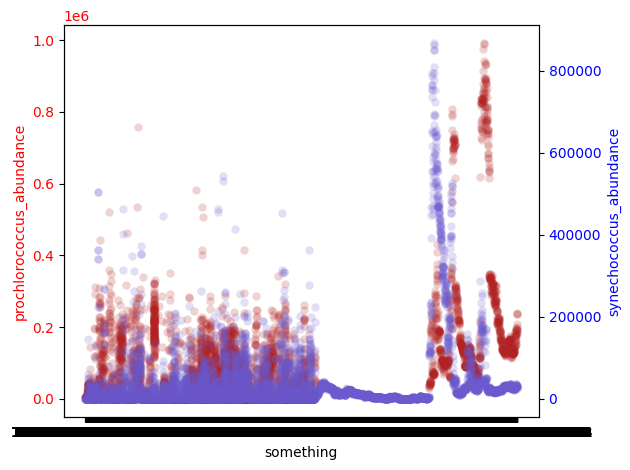

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
c1, c2 = 'firebrick', 'slateblue'
#t1, t2 = 'tblSeaFlow_v1_5', 'tblDarwin_Nutrient_Climatology'
v1, v2 = 'prochlorococcus_abundance', 'synechococcus_abundance'
ax1.plot(df['time'], df[v1], 'o', color=c1, markeredgewidth=0, label='SeaFlow', alpha=0.2)
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_ylabel(v1 , color='r')

ax2.plot(df['time'], df[v2], 'o', color=c2, markeredgewidth=0, label='Darwin', alpha=0.2)
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylabel(v2 , color='b')
ax1.set_xlabel('something')
fig.tight_layout()

In [17]:
df.tail()


time      lat       lon  depth            table   cruise  \
9995  2011-09-22T23:54:03  32.7270  139.7375    5.0  tblSeaFlow_v1_5  Tokyo_3   
9996  2011-09-22T23:57:03  32.7347  139.7558    5.0  tblSeaFlow_v1_5  Tokyo_3   
9997  2011-09-23T00:00:21  32.7432  139.7759    5.0  tblSeaFlow_v1_5  Tokyo_3   
9998  2011-09-23T00:03:21  32.7511  139.7944    5.0  tblSeaFlow_v1_5  Tokyo_3   
9999  2011-09-23T00:06:21  32.7584  139.8133    5.0  tblSeaFlow_v1_5  Tokyo_3   

      prochlorococcus_abundance  synechococcus_abundance  \
9995              207744.164861             29589.282752   
9996              199164.355631             24069.027977   
9997              238299.447524             29808.305034   
9998              236965.951963             32596.794852   
9999              237238.328523             33575.137098   

      picoeukaryote_abundance        sst  ...        Fe          O2        Si  \
9995             20433.854457  26.914993  ...  0.000159  213.658037  8.430109   
9996             20067.627860  26.914993  ...  0.000159  213.658037  8.430109   
9997             26231.308430  26.599993  ...  0.000159  213.658037  8.430109   
9998             27949.593956  26.599993  ...  0.000159  213.658037  8.430109   
9999             29054.128538  26.599993  ...  0.000159  213.658037  8.430109   

            PP  density_WOA_clim  salinity_WOA_clim  nitrate_WOA_clim  \
9995  0.010031         22.106624          34.242396          0.193615   
9996  0.010031         22.126306          34.279096          0.187738   
9997  0.010031         22.126306          34.279096          0.187738   
9998  0.010031         22.154879          34.226631          0.214642   
9999  0.010031         22.154879          34.226631          0.214642   

      phosphate_WOA_clim  silicate_WOA_clim  oxygen_WOA_clim  
9995            0.050623           3.861103         4.659295  
9996            0.049693           3.801627         4.651492  
9997            0.049693           3.801627         4.651492  
9998            0.052145           3.793691         4.670438  
9999            0.052145           3.793691         4.670438  

[5 rows x 29 columns]

In [20]:
#later found this option which is similar
api.search_catalog('DOC concentration (climatology)')

Variable                      Table_Name  \
0  DOC_darwin_clim  tblDarwin_Nutrient_Climatology   

                         Long_Name     Unit   Make Sensor Process_Level  \
0  DOC concentration (climatology)  mmol C/  Model  Blend   Reprocessed   

      Study_Domain  Temporal_Resolution Spatial_Resolution  ...  \
0  Biogeochemistry  Monthly Climatology      1/2Â° X 1/2Â°  ...   

                    Data_Source                   Distributor  \
0  http://darwinproject.mit.edu  http://darwinproject.mit.edu   

                                 Dataset_Description  \
0  This version of the model is modified from Dut...   

                                   Acknowledgement  Dataset_ID   ID  \
0  Data provided by: http://darwinproject.mit.edu/          21  162   

   Visualize                                           Keywords  \
0          1  bio, biogeochem, biogeochemistry, biogo, blend...   

   Unstructured_Dataset_Metadata  Unstructured_Variable_Metadata  
0                            NaN                             NaN  

[1 rows x 39 columns]

In [23]:
api.search_catalog('global ocean data analysis project for carbon')

Variable     Table_Name  \
0  cruise_expocode      tblGLODAP   
1         NCEP_SLP  tblSOCATv2022   

                                           Long_Name Unit         Make  \
0              Expocode â Expedition Code for NODC  NaN  Observation   
1  Sea Level Pressure - Interpolated (NCEP/NCAR R...  hPa  Observation   

    Sensor Process_Level Study_Domain Temporal_Resolution Spatial_Resolution  \
0  In-Situ   Reprocessed      Biology           Irregular          Irregular   
1    Blend   Reprocessed      Physics           Irregular          Irregular   

   ...                                        Data_Source  \
0  ...  https://doi.org/10.7289/v5kw5d97, doi: https:/...   
1  ...  SOCAT (SurfaceOcean CO2 Atlas); https://www.so...   

                                         Distributor  \
0  NOAA - https://www.nodc.noaa.gov/ocads/oceans/...   
1      https://www.socat.info/index.php/data-access/   

                                 Dataset_Description  \
0  The GLODAP V2 (Global Ocean Data Analysis Prod...   
1  âThis dataset consists of the Surface Ocean ...   

                                     Acknowledgement  Dataset_ID     ID  \
0  Data provided by: National Oceanic and Atmosph...          97   1389   
1  Before using SOCAT data products, please read ...         539  11007   

   Visualize                                           Keywords  \
0        NaN  biogeochemistry, carbon, chemistry, cruise, gl...   
1        1.0  AOML, Arctic Ocean, ASVs, Atlantic Oceanograph...   

   Unstructured_Dataset_Metadata  Unstructured_Variable_Metadata  
0                            NaN                             NaN  
1                            NaN                             NaN  

[2 rows x 39 columns]

In [26]:
api.get_var_coverage('tblGLODAP','toc')


Time_Min                  Time_Max  Lat_Min  Lat_Max  \
0  1972-07-24T00:00:00.000Z  2017-02-22T00:00:00.000Z  -78.638       90   

   Lon_Min  Lon_Max  Depth_Min  Depth_Max  
0     -180      180          0       7808

In [27]:
api.columns('tblGLODAP')

['time',
 'lat',
 'lon',
 'depth',
 'pressure',
 'temperature',
 'theta_potential_temperature',
 'salinity',
 'sigma0_potential_density',
 'sigma1_potential_density_ref_1000_dbar',
 'sigma2_potential_density_ref_2000_dbar',
 'sigma3_potential_density_ref_3000_dbar',
 'sigma4_potential_density_ref_4000_dbar',
 'gamma_neutral_density',
 'oxygen',
 'aou',
 'nitrate',
 'nitrite',
 'silicate',
 'phosphate',
 'tco2',
 'talk',
 'phts25p0_pH_25C_0dbar',
 'phtsinsitutp_pH_insitu',
 'cfc11',
 'pcfc11',
 'cfc12',
 'pcfc12',
 'cfc113',
 'pcfc113',
 'ccl4',
 'pccl4',
 'sf6',
 'psf6',
 'c13',
 'c14',
 'c14err',
 'h3',
 'h3err',
 'he3',
 'he3err',
 'he',
 'heerr',
 'neon',
 'neonerr',
 'o18',
 'toc',
 'doc',
 'don',
 'tdn',
 'chla',
 'cruise_expocode',
 'ID']

In [25]:
#remember BATS does TOC:
api.search_catalog('Bermuda Atlantic Time-Series Study (BATS) Bottle')

Variable                  Table_Name  \
0             alkalinity              tblBATS_Bottle   
1   bacteria_enumeration              tblBATS_Bottle   
2                    CO2              tblBATS_Bottle   
3              cruise_ID              tblBATS_Bottle   
4           CTD_salinity              tblBATS_Bottle   
..                   ...                         ...   
57                 UNOLS   tblBATS_Bottle_Validation   
58                  dark  tblBATS_Primary_Production   
59                   lt1  tblBATS_Primary_Production   
60                   lt2  tblBATS_Primary_Production   
61                   lt3  tblBATS_Primary_Production   

                                 Long_Name           Unit         Make  \
0                               Alkalinity         uequiv  Observation   
1                     Bacteria Enumeration  cells*10^8/kg  Observation   
2                                Total CO2        umol/kg  Observation   
3                                Cruise ID            NaN  Observation   
4                             CTD Salinity         PSS-78  Observation   
..                                     ...            ...          ...   
57                       UNOLS Cruise Name            NaN  Observation   
58      14C Primary Production Dark Bottle    mgC/m^3/day  Observation   
59  14C Primary Production Light Bottle #1    mgC/m^3/day  Observation   
60  14C Primary Production Light Bottle #2    mgC/m^3/day  Observation   
61  14C Primary Production Light Bottle #3    mgC/m^3/day  Observation   

           Sensor Process_Level     Study_Domain Temporal_Resolution  \
0   Uncategorized   Reprocessed  Biogeochemistry           Irregular   
1   Uncategorized   Reprocessed  Biogeochemistry           Irregular   
2      Coulometer   Reprocessed  Biogeochemistry           Irregular   
3   Uncategorized   Reprocessed  Biogeochemistry           Irregular   
4             CTD   Reprocessed  Biogeochemistry           Irregular   
..            ...           ...              ...                 ...   
57  Uncategorized   Reprocessed  Biogeochemistry           Irregular   
58  Uncategorized   Reprocessed  Biogeochemistry           Irregular   
59  Uncategorized   Reprocessed  Biogeochemistry           Irregular   
60  Uncategorized   Reprocessed  Biogeochemistry           Irregular   
61  Uncategorized   Reprocessed  Biogeochemistry           Irregular   

   Spatial_Resolution  ...                          Data_Source  \
0           Irregular  ...  Bermuda Institute of Ocean Sciences   
1           Irregular  ...  Bermuda Institute of Ocean Sciences   
2           Irregular  ...  Bermuda Institute of Ocean Sciences   
3           Irregular  ...  Bermuda Institute of Ocean Sciences   
4           Irregular  ...  Bermuda Institute of Ocean Sciences   
..                ...  ...                                  ...   
57          Irregular  ...  Bermuda Institute of Ocean Sciences   
58          Irregular  ...  Bermuda Institute of Ocean Sciences   
59          Irregular  ...  Bermuda Institute of Ocean Sciences   
60          Irregular  ...  Bermuda Institute of Ocean Sciences   
61          Irregular  ...  Bermuda Institute of Ocean Sciences   

                            Distributor  \
0   Bermuda Institute of Ocean Sciences   
1   Bermuda Institute of Ocean Sciences   
2   Bermuda Institute of Ocean Sciences   
3   Bermuda Institute of Ocean Sciences   
4   Bermuda Institute of Ocean Sciences   
..                                  ...   
57  Bermuda Institute of Ocean Sciences   
58  Bermuda Institute of Ocean Sciences   
59  Bermuda Institute of Ocean Sciences   
60  Bermuda Institute of Ocean Sciences   
61  Bermuda Institute of Ocean Sciences   

                                  Dataset_Description  \
0   The BATS Bottle dataset is a collection of dis...   
1   The BATS Bottle dataset is a collection of dis...   
2   The BATS Bottle dataset is a collection of dis...   
3   The BATS Bottle dataset is a collec

In [28]:
api.columns('tblBATS_Bottle')

['time',
 'lat',
 'lon',
 'depth',
 'temp',
 'CTD_salinity',
 'salinity',
 'sigma_theta',
 'oxygen',
 'oxygen_fix_temp',
 'oxygen_anomaly',
 'CO2',
 'alkalinity',
 'nitrate_nitrite',
 'nitrite',
 'phosphate',
 'silicate',
 'POC',
 'PON',
 'TOC',
 'TN',
 'bacteria_enumeration',
 'POP',
 'total_dissolved_phosphorus',
 'low_level_phosphorus',
 'particulate_biogenic_silica',
 'particulate_lithogenic_silica',
 'prochlorococcus',
 'synechococcus',
 'picoeukaryotes',
 'nanoeukaryotes',
 'cruise_ID',
 'niskin_flag',
 'UNOLS']

In [29]:
api.columns('tblBATS_Bottle_Validation')


['time',
 'lat',
 'lon',
 'depth',
 'temp',
 'CTD_salinity',
 'salinity',
 'sigma_theta',
 'oxygen',
 'oxygen_fix_temp',
 'oxygen_anomaly',
 'CO2',
 'alkalinity',
 'nitrate_nitrite',
 'nitrite',
 'phosphate',
 'silicate',
 'POC',
 'PON',
 'TOC',
 'TN',
 'bacteria_enumeration',
 'POP',
 'total_dissolved_phosphorus',
 'low_level_phosphorus',
 'prochlorococcus',
 'synechococcus',
 'picoeukaryotes',
 'nanoeukaryotes',
 'cruise_ID',
 'niskin_flag',
 'UNOLS']

In [31]:
api.columns('tblGeotraces_Seawater_IDP2021v2')

['time',
 'lat',
 'lon',
 'N_SAMPLES',
 'N_STATIONS',
 'cruise_id',
 'station_id',
 'station_type',
 'Bot__Depth',
 'Operator_s_Cruise_Name',
 'Ship_Name',
 'Period',
 'Chief_Scientist',
 'GEOTRACES_Scientist',
 'Cruise_Aliases',
 'Cruise_Information_Link',
 'BODC_Cruise_Number',
 'CTDPRS_T_VALUE_SENSOR',
 'CTDPRS_T_VALUE_SENSOR_qc',
 'DEPTH_SENSOR',
 'DEPTH_SENSOR_qc',
 'Rosette_Bottle_Number',
 'Rosette_Bottle_Number_qc',
 'GEOTRACES_Sample_ID',
 'GEOTRACES_Sample_ID_qc',
 'Bottle_Flag',
 'Bottle_Flag_qc',
 'Cast_Identifier',
 'Cast_Identifier_qc',
 'Sampling_Device',
 'Sampling_Device_qc',
 'BODC_Bottle_Number',
 'BODC_Bottle_Number_qc',
 'BODC_Event_Number',
 'BODC_Event_Number_qc',
 'Single_Cell_ID',
 'Single_Cell_ID_qc',
 'NCBI_Metagenome_BioSample_Accession',
 'NCBI_Metagenome_BioSample_Accession_qc',
 'NCBI_Single_Cell_Genome_BioProject_Accession',
 'NCBI_Single_Cell_Genome_BioProject_Accession_qc',
 'NCBI_16S_18S_rRNA_gene_BioSample_Accession',
 'NCBI_16S_18S_rRNA_gene_BioSamp